In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # 0 = Malignant, 1 = Benign

In [3]:
# Check for missing values
print(X.isnull().sum().sum()) 

0


In [4]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
print("Data Preprocessing Completed!")

Data Preprocessing Completed!


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [8]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(n_neighbors=5)
}

In [10]:
# Dictionary to store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    results.append([name, accuracy, class_report["0"]["precision"], class_report["0"]["recall"], class_report["0"]["f1-score"]])

In [11]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.973684   0.976190  0.953488  0.964706
1        Decision Tree  0.929825   0.906977  0.906977  0.906977
2        Random Forest  0.964912   0.975610  0.930233  0.952381
3                  SVM  0.982456   1.000000  0.953488  0.976190
4                 k-NN  0.947368   0.930233  0.930233  0.930233


C:\Users\beefa\AppData\Local\Temp\ipykernel_12520\938043872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="coolwarm")


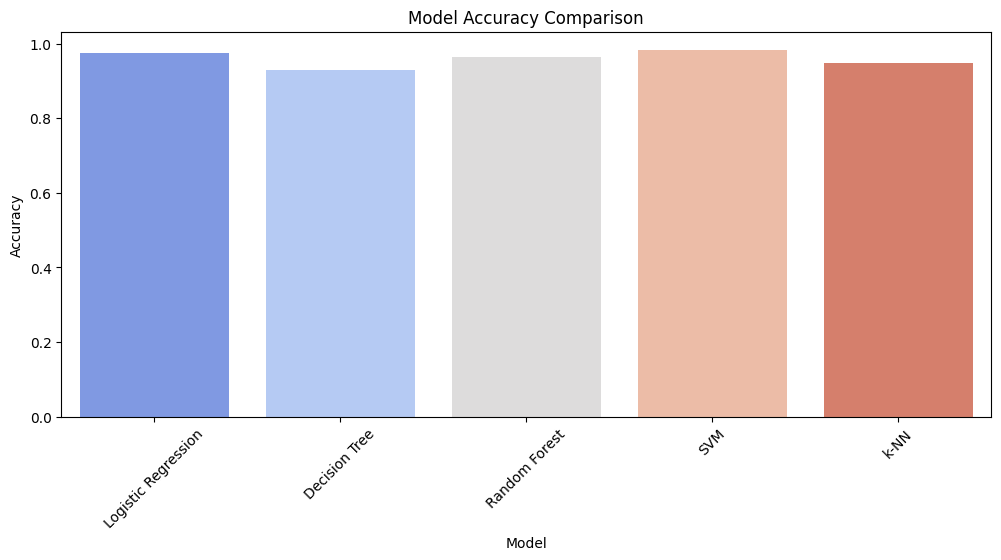

In [12]:
plt.figure(figsize=(12, 5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.show()
